<a href="https://colab.research.google.com/github/pahwa1902/Learning/blob/master/LoanDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gensim
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import tokenize
from nltk.corpus import stopwords
import math
from nltk.stem import WordNetLemmatizer
from nltk import RegexpTokenizer
from sklearn.decomposition import PCA

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
embedding = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz',binary=True,unicode_errors='ignore')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [5]:
data = pd.read_csv('/content/drive/My Drive/train_indessa.csv')

In [6]:
nan_title=data[data['emp_title'].isnull()].index.tolist()

In [7]:
data.drop(nan_title,inplace=True)

In [8]:
pca = PCA(n_components=20)

In [9]:
data['desc'] = data['desc'].replace(np.nan,'',regex=True)

In [10]:
data['emp_title'] = data['emp_title'].replace(np.nan,"",regex=True)

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

In [13]:
a = set(data['desc'].tolist())
full_string=''
for i in a:
  full_string = full_string+i

In [14]:
words = list(set(tokenizer.tokenize(full_string)))

In [15]:
lemma_words=[]
for i in words:
  lemma_words.append(lemmatizer.lemmatize(i))

In [16]:
lemma_unique_words = list(set(lemma_words))


In [54]:
len(lemma_unique_words)

31556

In [17]:
word_dict={}

In [18]:
embedding_vec = []
iter = 0
for i,v in enumerate(lemma_unique_words):
  if(v in embedding.index2entity):
    word_dict[v]=iter
    iter+=1
    embedding_vec.append(embedding.get_vector(v))

In [ ]:
word_dict

In [56]:
embedding_vec = np.array(embedding_vec)
embedding_vec.shape

(23304, 300)

In [57]:
principalcomponents=pca.fit_transform(embedding_vec)

In [58]:
principalcomponents.shape

(23304, 20)

In [59]:
def words_tokenize(x):
  if(x):
    x=" ".join(i for i in x.split() if i not in stop_words)
    x=tokenizer.tokenize(x)
    
    return x
data['desc'] = data['desc'].apply(lambda x: words_tokenize(x))

In [60]:
def lemma_words(x):
  if(x):
    words = [lemmatizer.lemmatize(i) for i in x]
    return words

data['desc'] = data['desc'].apply(lambda x : lemma_words(x))

In [75]:
embed = []

In [ ]:
def embedding_desc(x):
  if(x['desc']):
    
    embd = [principalcomponents[word_dict[i]] if i in word_dict.keys() else 0 for i in x['desc']]
    
    emdb_1 = np.mean(np.array(embd),axis=0)
    embed.append(emdb_1)
    

data.apply(embedding_desc,axis=1)

In [77]:
columns_embd=['embed'+str(i) for i in range(20)]

In [122]:
shapes = [arr.shape for arr in embed]

In [111]:
emp_list=[]

In [120]:
emp_list

[37474, 69777]

In [123]:
for i in range(len(shapes)):
  if(shapes[i]==()):
    print(i)
  


In [121]:
del embed[69776]

In [124]:
embed_stack = np.stack(embed,axis=0)

In [125]:
data.drop(emp_list,inplace=True)

In [ ]:
embed

In [126]:
df_embd = pd.DataFrame(embed_stack,columns=columns_embd)

In [127]:
data = pd.concat([data,df_embd],axis=1)

In [ ]:
data.head()

In [ ]:
data_status = data.groupby('loan_status').size()
data_status

([<matplotlib.patches.Wedge at 0x7fb74a22e358>,
 [Text(-0.8105012894960076, 0.7436986350164353, ''),
  Text(0.8105012198659126, -0.7436987109010395, '')])

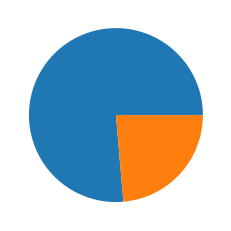

In [ ]:
plt.pie(data_status)

In [ ]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,Motgage,Own,Rent,None,Other
0,58189336,14350,14350,14350.0,36 months,,19.19,2,E3,clerk,9.0,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0,0,1,0,0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,5,B4,Human Resources Specialist,0.0,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0,1,0,0,0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,6,A4,Driver,2.0,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0,0,1,0,0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,3,D5,Us office of Personnel Management,NaN,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0,0,0,1,0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,5,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,NaN,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0,0,0,1,0,0


In [130]:
def replace_grade(x):
  if(x=='G'):
    return 0
  if(x=='F'):
    return 1
  if(x=='E'):
    return 2
  if(x=='D'):
    return 3
  if(x=='C'):
    return 4
  if(x=='B'):
    return 5
  if(x=='A'):
    return 6

In [131]:
grade= data['grade'].apply(lambda x:replace_grade(x))

In [132]:
data['grade'] = grade

In [133]:
def experience(x):
  if(x=='< 1 year'):
    return 0
  if(x=='1 year'):
    return 1
  if(x=='2 years'):
    return 2
  if(x=='3 years'):
    return 3
  if(x=='4 years'):
    return 4
  if(x=='5 years'):
    return 5
  if(x=='6 years'):
    return 6
  if(x=='7 years'):
    return 7
  if(x=='8 years'):
    return 8
  if(x=='9 years'):
    return 9


In [134]:
experience = data['emp_length'].apply(lambda x:experience(x))

In [135]:
data['emp_length']=experience

In [136]:
data_experience = data.groupby('emp_length').size()

In [ ]:
plt.pie(data_experience,labels=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years'])

In [ ]:
data_grade = data.groupby('grade').size()
plt.pie(data_grade,labels=["G",'F','E','D','C','B','A'])

In [ ]:
status_grade = data[data['grade']==0]['loan_status']
status_grade.value_counts()/len(status_grade)

0    0.764048
1    0.235952
Name: loan_status, dtype: float64

In [ ]:
data.groupby('home_ownership').size()

home_ownership
ANY              3
MORTGAGE    265940
NONE            36
OTHER          117
OWN          52664
RENT        213668
dtype: int64

In [137]:
any_index = data[data['home_ownership']=='ANY'].index
data.drop(any_index,inplace=True)

In [138]:
data=data.reindex(columns=data.columns.tolist()+['Motgage','Own','Rent','None','Other'])

In [139]:
data_morg = []
data_own = []
data_rent = []
data_none =[]
data_other = []
def home(x,data,value):
  if(x==value):
    data.append(1)
  else:
    data.append(0)

In [ ]:
data['home_ownership'].apply(lambda x:home(x,data_morg,'MORTGAGE'))
data['home_ownership'].apply(lambda x:home(x,data_own,'OWN'))
data['home_ownership'].apply(lambda x:home(x,data_rent,'RENT'))
data['home_ownership'].apply(lambda x:home(x,data_none,'NONE'))
data['home_ownership'].apply(lambda x:home(x,data_other,'OTHER'))

In [141]:
data['Motgage']=data_morg
data['Own'] = data_own
data['Rent']=data_rent
data['None'] = data_none
data['Other'] = data_other

In [142]:
data.drop(['home_ownership'],axis=1,inplace=True)

In [ ]:
data.groupby('verification_status').size()

In [143]:
data_ver=[]
data_notver=[]
data_source=[]

data['verification_status'].apply(lambda x:home(x,data_ver,'Verified'))
data['verification_status'].apply(lambda x:home(x,data_notver,'Not Verified'))
data['verification_status'].apply(lambda x:home(x,data_source,'Source Verified'))

data = data.reindex(columns = data.columns.tolist()+['Verified','Not Verified','Source Verified'])
data['Verified']=data_ver
data['Not Verified'] = data_notver
data['Source Verified'] = data_source

In [144]:
data.drop(['verification_status'],axis=1,inplace=True)

In [ ]:
data.head()

pymnt_plan
n    532417
y         8
dtype: int64

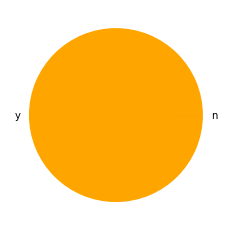

In [ ]:
payment_data = data.groupby('pymnt_plan').size()
plt.pie(payment_data,labels=['y','n'],colors=['orange','blue'])
payment_data

In [145]:
data.drop(['pymnt_plan'],axis=1,inplace=True)

In [ ]:
type = data[data['application_type']=='JOINT']['loan_status']
type.value_counts()

0    304
1      1
Name: loan_status, dtype: int64

In [146]:
def type(x):
  if(x=='JOINT'):
    return 0
  else:
    return 1

type_data = data['application_type'].apply(lambda x: type(x))
data['application_type'] = type_data


In [ ]:
data.head()

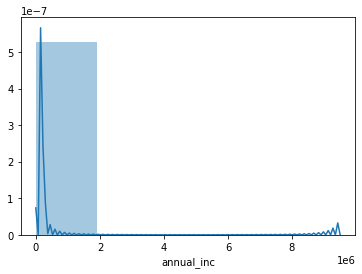

In [ ]:
sns.distplot(data['annual_inc'],bins=5)

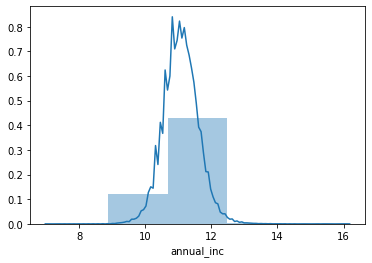

In [ ]:
data_log = np.log(data['annual_inc'])
sns.distplot(data_log,bins=5)

In [147]:
data_bin = pd.qcut(data['annual_inc'],10)


In [148]:
income_data=data['annual_inc']
data['annual_inc']=data_bin

In [149]:
bin_list = data_bin.unique()
column_income = ["income"+str(i) for i in bin_list]
data = data.reindex(columns=data.columns.tolist()+column_income)


In [150]:
for i in column_income[:-1]:
  data[i]=0

In [151]:
data.drop(['incomenan'],axis=1,inplace=True)

In [ ]:
def income(x):
  value = str(x['annual_inc'])
  if(value != 'nan'):
    data["income"+value].loc[x.name]=1

  
  
data.apply(income,axis=1)

In [ ]:
data.head()

In [ ]:
(data.groupby('purpose').size())

purpose
car                     5266
credit_card           123670
debt_consolidation    314987
educational              260
home_improvement       31087
house                   2170
major_purchase         10284
medical                 5117
moving                  3243
other                  25651
renewable_energy         331
small_business          6146
vacation                2812
wedding                 1401
dtype: int64

In [153]:
purpose_data = data['purpose'].unique()
renewable_energy = np.argwhere(purpose_data=='renewable_energy')
education = np.argwhere(purpose_data=='educational')

purpose_data = np.delete(purpose_data,int(renewable_energy))
purpose_data = np.delete(purpose_data,int(education)-1)


In [154]:
data=data.reindex(columns=data.columns.tolist()+list(purpose_data))
for i in purpose_data:
  data[i]=0


In [ ]:
data.columns

In [ ]:
def purpose(x):
  purp = x['purpose']
  if(purp=='educational'):
    data['other'].loc[x.name] = 1
  if(purp=='renewable_energy'):
    data['other'].loc[x.name] = 1
  if(purp!='educational' and purp!='renewable_energy'):
    data[purp].loc[x.name] = 1

data.apply(purpose,axis=1)

In [156]:
data.drop(['purpose'],axis=1,inplace=True)

In [ ]:
data.head()

In [157]:
data=data.reindex(columns=data.columns.tolist()+['amount_per_income'])


In [158]:
data['amount_per_income'] = np.divide(data['loan_amnt'],income_data)

In [159]:
data = data.reindex(columns=data.columns.tolist()+['open_acc_rev_bal'])

In [160]:
data['open_acc_rev_bal'] = np.divide(data['revol_bal'],data['open_acc'])

In [161]:
data = data.reindex(columns=data.columns.tolist()+['open_acc_ratio'])

In [162]:
data['open_acc_ratio'] = np.divide(data['open_acc'],data['total_acc'])

In [163]:
data=data.reindex(columns=data.columns.tolist()+['deliq_rate'])

In [164]:
data['deliq_rate'] = np.divide(data['acc_now_delinq'],data['open_acc'])

In [165]:
data = data.reindex(columns=data.columns.tolist()+['revolve_rate'])

In [166]:
data['revolve_rate'] = np.divide(data['open_acc'],data['total_rev_hi_lim'])

In [167]:
data.drop(['annual_inc'],axis=1,inplace=True)
data.drop(['title'],axis=1,inplace=True)

In [ ]:
emp_data = data.groupby('emp_title').size()
sorted_data = np.sort(emp_data)
len(sorted_data[sorted_data>500])

In [169]:
emp_df = pd.DataFrame(emp_data)
emp_df.reset_index(inplace=True)


In [170]:
emp_df.columns=['emp_title','freq']
emp_df_freq = emp_df[emp_df['freq']>500]
emp_less_freq = emp_df[emp_df['freq']<=500]['emp_title'].tolist()

In [171]:
emp_title_freq = emp_df_freq['emp_title'].tolist()
emp_title_freq.append('other')


In [172]:
data = data.reindex(columns=data.columns.tolist()+['count_title'])

In [173]:
dict_title = dict(data.groupby('emp_title').size())

In [ ]:
data['emp_title']

In [178]:
def count_item(x):
  if(x):
    return dict_title[x]

data['count_title'] = data['emp_title'].apply(lambda x:count_item(x))

In [12]:
from sklearn.feature_extraction import FeatureHasher

In [13]:
feature_title = FeatureHasher(n_features=20,input_type='string')

In [14]:
data['emp_title']=data['emp_title'].astype(str)

In [18]:
title = feature_title.fit_transform(data['emp_title'])


In [20]:
title = title.toarray()

In [16]:
columns_title = ['title '+str(i) for i in range(20)]

In [17]:
df_title = pd.DataFrame(title,columns=columns_title)

In [ ]:
data = pd.concat([data,df_title],axis=1)

In [179]:
emp_title = ['emp_title '+i for i in emp_title_freq]
data = data.reindex(columns=data.columns.tolist()+emp_title)


In [180]:
for i in emp_title:
  data[i]=0

In [ ]:
item=data.columns
item[-80:]

In [ ]:
def emp(x):
 
  if(x['emp_title'] not in emp_title_freq):
    data['emp_title '+'other'].loc[x.name]=1
  else:
    
    data['emp_title '+x['emp_title']].loc[x.name]=1
    
data.apply(emp,axis=1)


In [ ]:
data.head()

In [183]:
data = data.reindex(columns=data.columns.tolist()+['balance_per_account'])

In [184]:
data['balance_per_account'] = np.divide(data['tot_cur_bal'],data['open_acc'])

In [185]:
data = data.reindex(columns=data.columns.tolist()+['delinq_per_acc'])

In [186]:
data['delinq_per_acc'] = np.divide(data['delinq_2yrs'],data['open_acc'])

In [187]:
data = data.reindex(columns=data.columns.tolist()+['emi_per_term'])

In [188]:
data.drop(data[data['last_week_pay']=='NAth week'].index,axis=0,inplace=True)

In [189]:
data['term'] = data['term'].astype(str)

In [190]:
a = data[data['term']=='nan'].index
data.drop(a,axis=0,inplace=True)

In [191]:
def clear_data(x):
  a = int(x['term'].split()[0])
  b = x['last_week_pay'].split()[0]
  c = int(b.split('t')[0])

  return (c*7)/(a*30)

data_emi_per_term = data.apply(clear_data,axis=1)



In [192]:
data['emi_per_term'] = data_emi_per_term

In [193]:
data.drop(['emp_title'],axis=1,inplace=True)
data.drop(['desc'],axis=1,inplace=True)
data.drop(['sub_grade'],axis=1,inplace=True)

In [ ]:
data['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [194]:
def term(x):
  if(x['term']=='36 months'):
    return 0
  else:
    return 1

term_data = data.apply(term,axis=1)

In [195]:
data['term'] = term_data

In [196]:
def week(x):
  b = x['last_week_pay'].split()[0]
  c = int(b.split('t')[0])

  return c

week_data = data.apply(week,axis=1)

In [197]:
data['last_week_pay'] = week_data

In [198]:
data.drop(['batch_enrolled'],axis=1,inplace=True)

In [199]:
def status(x):
  if(x['initial_list_status']=='f'):
    return 1
  else:
    return 0

status_data = data.apply(status,axis=1)

data['initial_list_status'] = status_data

In [200]:
a = [(row['zip_code'],row['addr_state']) for index, row in data.iterrows()]


In [201]:
data=data.reindex(columns=data.columns.tolist()+['location'])

In [202]:
data['location'] = [str(i) for i in a]

In [203]:
location_dict = dict(data.groupby('location').size())

In [204]:
data = data.reindex(columns=data.columns.tolist()+['location_count'])

In [205]:
def location(x):
  return location_dict[x]

data['location_count'] = data['location'].apply(lambda x:location(x))

In [ ]:
data['location'].loc[0]

"('349xx', 'FL')"

In [206]:
features = FeatureHasher(n_features=10,input_type='string')

In [207]:
hashed_feature = features.fit_transform(data['location'])
hashed_feature = hashed_feature.toarray()

In [208]:
data = pd.concat([data,pd.DataFrame(hashed_feature)],axis=1)

In [209]:
data.drop(['location'],axis=1,inplace=True)
data.drop(['zip_code'],axis=1,inplace=True)
data.drop(['addr_state'],axis=1,inplace=True)

In [210]:
columns_verification = data['verification_status_joint'].unique().tolist()
columns_joint = ['joint_status '+str(i) for i in columns_verification]
#data = data.reindex(columns=data.columns.tolist()+columns_joint)

In [211]:
for i in columns_joint:
  data[i]=0

In [ ]:
def verification(x):
  data['joint_status '+str(x['verification_status_joint'])].loc[x.name] = 1

data.apply(verification,axis=1)

In [213]:
data.drop(['verification_status_joint'],axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
dict_na={}
for i in data.columns:
  dict_na[i]=data[i].isna().sum()

In [242]:
for i in data.columns:
  
  mean = data[i].mean()
  data[i].fillna(mean,inplace=True)

In [215]:
data.drop(['member_id'],axis=1,inplace=True)

In [ ]:
data_copy = data.copy()

In [216]:
import regex as re

In [ ]:
data_copy.rename(columns={'income(1895.999, 35000.0]': 'income 1895.999 35000.0'},inplace=True)

In [276]:
def clean_feature(x):
   x = re.sub(']|\(','',x)
   return x

In [283]:
data.columns[58]

'income(1895.999, 35000.0]'

In [284]:
dict_income = {data.columns[i]:clean_feature(data.columns[i]) for i in range(58,67)}

In [ ]:
data_copy.rename(columns=dict_income,inplace=True)

In [285]:
data.rename(columns=dict_income,inplace=True)

In [ ]:
data.columns.tolist()

In [220]:
import xgboost as xgb

In [221]:
y = data.pop('loan_status')

In [226]:
set(y)

{0.0, 1.0}

In [223]:
a = y[y==0.24287779849797758]
b = a.index


In [224]:
y.drop(b.tolist(),inplace=True)

In [225]:
data.drop(b.tolist(),axis=0,inplace=True)

In [227]:
set(y)

{0.0, 1.0}

In [228]:
def normalize(x):
  dataNorm=((x-x.min())/(x.max()-x.min()))
    
  return dataNorm

In [229]:
data = normalize(data)

In [287]:
x_train = data[:int(0.9*len(data))]
x_valid = data[int(0.9*len(data)):]

In [288]:
y_train = y[:int(0.9*len(data))]
y_valid = y[int(0.9*len(data)):]

In [ ]:
a = data.isnull().any().tolist()
for i in range(len(a)):
  if(a[i]==True):
    print(i)

In [251]:
data.isnull().any().unique()

array([False])

In [250]:
data.drop(data.columns[70],axis=1,inplace=True)

In [289]:
clf = xgb.XGBClassifier()

In [233]:
data=data.replace([np.inf,-np.inf],np.nan)

In [234]:
data.drop([5],axis=1,inplace=True)

In [235]:
data.drop(['revolve_rate'],axis=1,inplace=True)

In [237]:
data.drop(['income(35000.0, 43000.0]'],axis=1,inplace=True)

In [298]:
data = data.reindex(columns=data.columns.tolist()+['embed_sum'])

In [ ]:
def embedsum(x):
  a = np.array(x)
  return np.mean(a)

data['embed_sum'] = data[columns_embd].apply(lambda x:embedsum(x))

In [ ]:
data.head()

In [290]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [291]:
predict = clf.predict(x_valid)

In [265]:
from sklearn.metrics import accuracy_score

In [292]:
accuracy_score(y_valid,predict)


0.8284662626591288

In [ ]:
clf.feature_importances_

In [ ]:
columns = data.columns
sorted_column=[]
for i in b:
  sorted_column.append(columns[i])

In [ ]:
sorted_column

[Index([                  'revol_util',                          'dti',
                          'recoveries',                  'delinq_2yrs',
                     'funded_amnt_inv',                'total_rec_int',
                      'delinq_per_acc',      'collection_recovery_fee',
                            'open_acc',                      'pub_rec',
                      'open_acc_ratio',           'total_rec_late_fee',
          'collections_12_mths_ex_med',                      'title 9',
                                 'Own',                      'Motgage',
                                'Rent',              'Source Verified',
           'joint_status Not Verified',                'last_week_pay',
                            'title 15',                     'Verified',
               'joint_status Verified',                      'title 0',
                        'Not Verified',    'income(1199.999, 34000.0]',
                           'revol_bal',                     'tit

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
model = RandomForestClassifier(criterion='entropy')

In [262]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [263]:
predict2=model.predict(x_valid)

In [266]:
accuracy_score(y_valid,predict2)

0.8357668686704356

In [267]:
import tensorflow as tf

In [268]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

In [269]:
validate_dataset = tf.data.Dataset.from_tensor_slices((x_valid,y_valid))

In [270]:
train_dataset = train_dataset.batch(32).shuffle(True)
validate_dataset = validate_dataset.batch(32)

In [271]:
tf.random.set_seed(0)

In [272]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(24,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(6,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(6,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(3,activation='relu',kernel_initializer=tf.keras.initializers.GlorotNormal()))
model.add(tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.GlorotNormal()))

In [273]:
loss = tf.keras.losses.BinaryCrossentropy()

In [274]:
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

In [275]:
model.fit(train_dataset,epochs=10,validation_data=validate_dataset)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13831/13831 [==============================] - 19s 1ms/step - loss: 0.4981 - accuracy: 0.7798 - val_loss: 0.4667 - val_accuracy: 0.7893
Epoch 2/10
13831/13831 [==============================] - 20s 1ms/step - loss: 0.4535 - accuracy: 0.7951 - val_loss: 0.4370 - val_accuracy: 0.8055
Epoch 3/10
13831/13831 [==============================] - 20s 1ms/step - loss: 0.4375 - accuracy: 0.8045 - val_loss: 0.4271 - val_accuracy: 0.8119
Epoch 4/10
13831/13831 [==============================] - 21s 1ms/s